### Monte Carlo Simulation of GME

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
from matplotlib import style

style.use("ggplot")

In [2]:
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 12, 31)
price = pdr.DataReader("GME", "yahoo", start, end)["Adj Close"]

In [3]:
returns = price.pct_change()
last_price = price[-1]

In [4]:
num_simulations = 1000
trading_days = 526

In [5]:
df = pd.DataFrame()

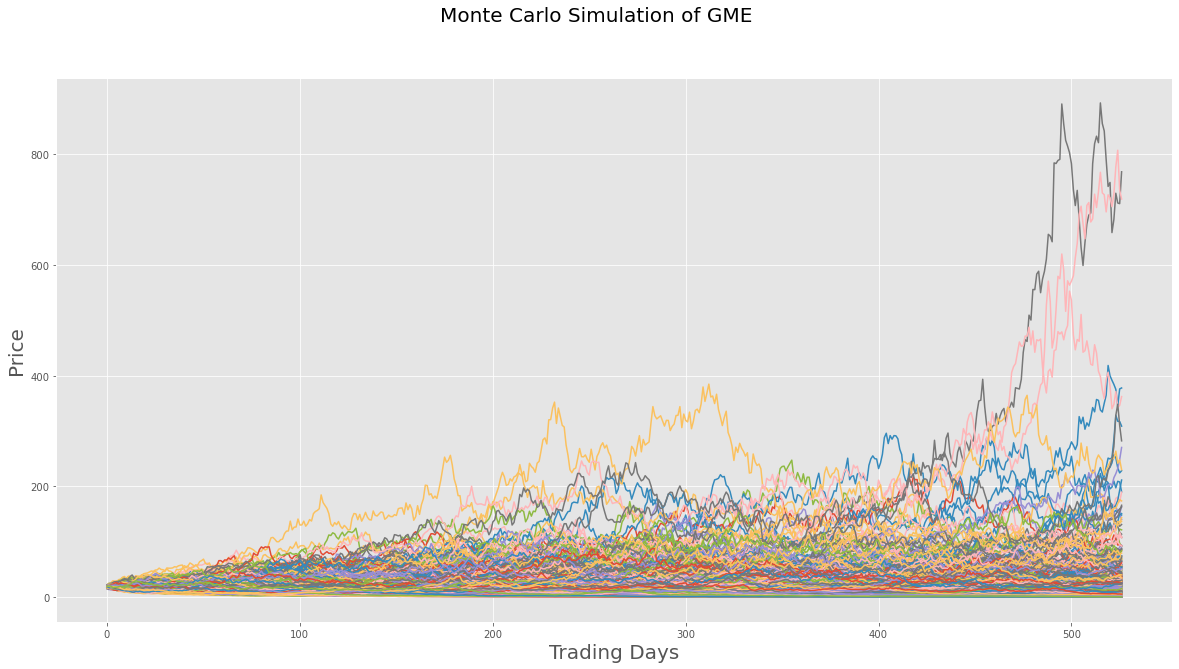

In [7]:
for x in range(num_simulations):
    count=0
    daily_vol = returns.std()
    
    price_series = []
    price = last_price*(1+np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for i in range(trading_days):
        if count == 526:
            break
        price = price_series[count]*(1+np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
        
    df[x] = price_series
    
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Monte Carlo Simulation of GME", fontsize=20)
plt.xlabel("Trading Days", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.plot(df)
plt.show()